In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

sine wave를 만드는 장치 혹은 소프트웨어를 phasor라고 한다. cosine도 만들 수 있음.

* sr: 1초에 숫자가 몇 개 있는가
* freq: sine곡선에서 태극 문양이 몇 회 반복되느냐, 주파수와 음의 높낮이를 측정하는데에 사용
* 1초 당 몇개가 있는가 -> Hz , 무엇이든지 측정할 수 있다
* 모든 sound는 sine wave의 합이다.

음의 높낮이는 freq, 음의 강도는 amp와 관련이 있다. 둘은 각각 독립적이다. 


amplitude, sampling rate, duration, frequency 정도만 정의해주면 sine wave를 만들 수 있다.

In [3]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = .5        # in seconds
freq = 200    # sine frequency, Hz

t = np.arange(1, sr)

: 1부터 9999까지의 숫자를 만들어냄.

t = np.arange(1, sr+1)/sr

: 1/10000부터 1까지의 숫자를 만들어냄.  -> 이게 1초 까지의 time sample을 만들어내는 방법. 1초안에 총 1만개의 sample을 만들어준다.

t = np.arange(1, sr* 0.5)/sr

: 

t = np.arange(1, sr* 0.5 +1)/sr

: 1/10000초부터 

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr
len(t)

5000

sin은 반드시 radian값을 받아들인다. 

-> 시간과 각도의 관계? 시간 자체가 각도가 될 수는 없음. 

그러나 freq값이 정해지면 time을 radian으로 바꿀 수 있음.


theta = t * 2 * pi

0부터 2pi까지 가는데 그것이 10000개로 쪼개짐.
1초동안에 2pi가 한개 들어감. 

time을 0부터 2초까지 만들었음. 마찬가지로 각도도 0부터 2pi까지 가게됨. 

0부터 2pi까지 가는데 그 안의 쪼개진 sample은 10000개.

* t를 먼저 정의해주고 time * 각도를 해버리면 된다. 2pi는 무조건 붙이고 freq곱해주면 된다.
* theta: time과 radian값들이 정확하게 sink가 되어있는 상태

In [5]:
# generate phase
theta = t * 2*np.pi * freq

sine wave가 입력값으로 받는 것은 "각도"

각도 계산하는 두가지 방법. degree가 있고 radian도 있다.

sin의 입력으로 들어오는 각도는 radian값으로 들어간다. degree값으로 넣으면 안됨

sin곡선으로 소리를 내고 싶다면 시간의 개념, 시간값을 꼭 만들어줘야 한다. 시간 축이 필요!

In [6]:
# generate signal by cosine-phasor
s = np.sin(theta)

In [7]:
len(s)

5000

* figure는 그냥 큰 틀
* ax.plot이후에 세 개의 argument가 들어옴. 마지막 .은 장식하는 부분이라 없어도 된다.

ax.plot(t, s) -> plotting을 하는데에는 theta가 쓰이지 않고 있음. t와 s만 사용.

time -> freq를 이용해서 theta값으로 converting -> sin에 넣어서 s로 받음.

쩜이 몇 개일까? 1만개 = len(s)

y축의 값이 t가 theta를 타고 s로 들어가서 뱉어내는 값.

plot(t[0:1000], s[0:1000]) t값도 0부터 999까지, s값도 0부터 999까지

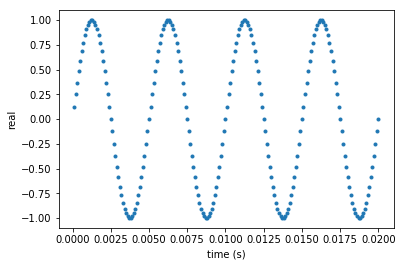

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200], s[0:200], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

* sin대신에 exp함수를 쓸 수도 있음.
* np.exp = e
* theta * 1j가 e의 지수로 들어감(1j -> i임)
* 결과값 c는 complex number로 나온다. (복소수)
* c의 개수는 theta의 vector 개수와 동일.
* x축은 a가되고, y축은 b가 됨(허수)

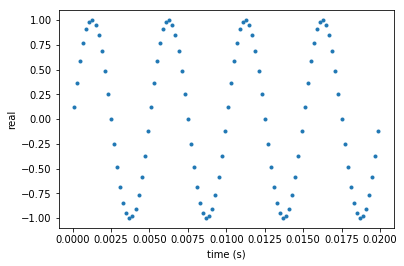

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200:2], s[0:200:2], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

In [15]:
# generate signal by complex-phasor
c =amp*np.exp(theta*1j)

sin은 plot할 때 x축에 들어가는 t과 y축에 들어가는 s 두가지 정보를 사용

exp는 plot할 때 x축에는 time, 두번째는 complex num에서 실수부분에 해당하는거, 세번째는 complex num에서 허수부분에 해당하는거.

c.real -> complex num의 a부분만 따옴. Y축

c.imag -> complex num의 b부분만 따옴. Z축

* 벡터의 길이가 무슨말일까..


Text(0.5, 0, 'imag')

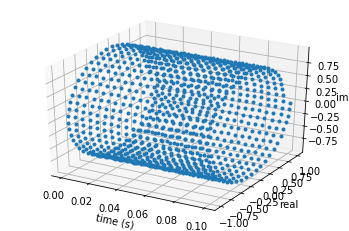

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

* (time, imag)로 보면 sine함수로 보임.
* (time, real)로 보면 cosine함수가 보임.

* exp함수를 사용하면 sin함수와 cosine함수를 둘 다 볼 수 있음. 

sin, exp함수를 사용하는것 모두를 phasor라고 함. 

* phasor사용하는 법

무엇보다 시간값을 먼저 설정해주어야 함. 시간값이 없어도 작동하기는 함. 하지만 실체가 있으려면 시간값을 만들어주어야함.

In [ ]:
ipd.Audio(s, rate=sr)

# Generate pulse train

모든 소리는 sine wave의 합. amp와  freq의 조정.

* time series, temporal trajectory, signal

모든 time series는 play하면 소리가 난다. ex) 기상변화와 온도변화. 모든 signal은 play하면 소리가 들림.

주식 시장도 sound는 아니지만 다양한 sine wave의 합이라고 말 할 수 있다.

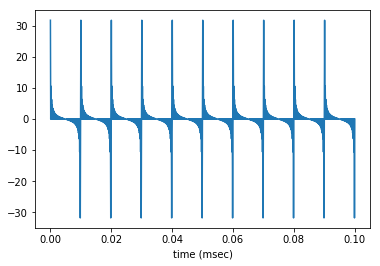

In [22]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

F = frequency

100, 200, 300, 400 ... 5000

for 루프 돌 때마다 만들어지는 signal = tmp.
이것이 계속 더해지고 더해지고 더해지고 해서 5000 hertz까지 더해짐.

s = np.zeros(len(t)); 이거를 정의해주지 않으면 s = s + tmp에서 s값을 모른다 하고 complain이 들어옴.

s는 time vector와 길이가 같은 zeros임.